# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [77]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanego polecenia !wget), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [78]:
if not os.path.exists("mandril.jpg"):
  !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py
import lut

--2023-03-08 15:59:53--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10330 (10K) [text/plain]
Saving to: ‘lut.py.12’

lut.py.12           100%[===================>]  10.09K  --.-KB/s    in 0s      

2023-03-08 15:59:54 (72.2 MB/s) - ‘lut.py.12’ saved [10330/10330]



Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

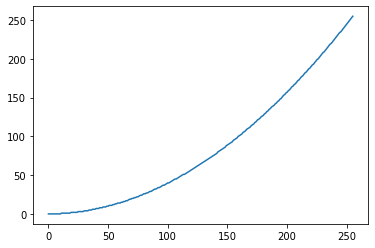

In [79]:
plt.plot(lut.kwadratowa)

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

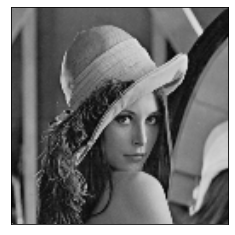

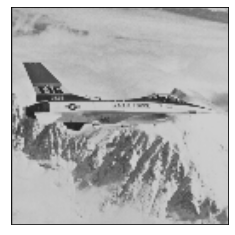

In [80]:
if not os.path.exists("lena.bmp"):
  !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
lena = cv2.imread('lena.bmp')
plt.imshow(lena)
plt.xticks([]), plt.yticks([])
plt.show()

if not os.path.exists("jet.bmp"):
  !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp
jet = cv2.imread('jet.bmp')
plt.imshow(jet)
plt.xticks([]), plt.yticks([])
plt.show()

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

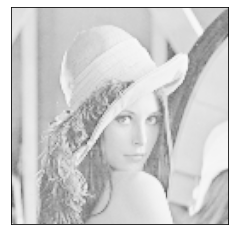

In [81]:
lenalog = cv2.LUT(lena, lut.log)
plt.imshow(lenalog)
plt.xticks([]), plt.yticks([])
plt.show()

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [82]:
def LUT(image, tab):
  new_image = cv2.LUT(image, tab)
  plt.figure()
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
  ax1.plot(tab)
  ax2.imshow(image)
  ax3.imshow(new_image)
  ax1.set_aspect('equal')
  plt.show()

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

<Figure size 432x288 with 0 Axes>

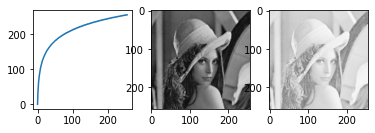

<Figure size 432x288 with 0 Axes>

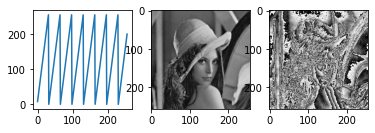

<Figure size 432x288 with 0 Axes>

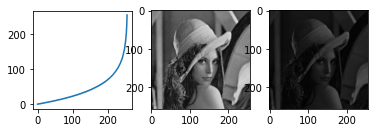

<Figure size 432x288 with 0 Axes>

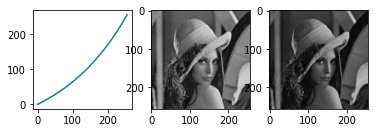

<Figure size 432x288 with 0 Axes>

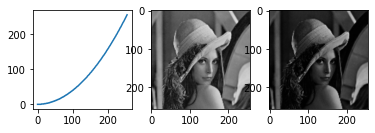

<Figure size 432x288 with 0 Axes>

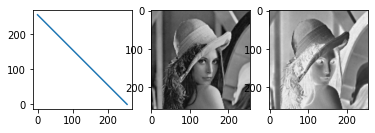

<Figure size 432x288 with 0 Axes>

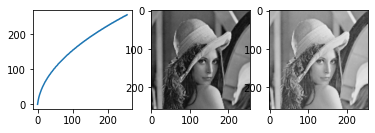

In [83]:
LUT(lena, lut.log)
LUT(lena, lut.pila)
LUT(lena, lut.odwlog)
LUT(lena, lut.wykladnicza)
LUT(lena, lut.kwadratowa)
LUT(lena, lut.odwrotna)
LUT(lena, lut.pierwiastkowa)

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

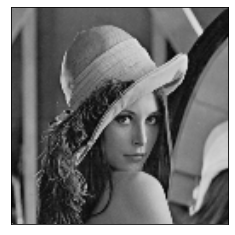

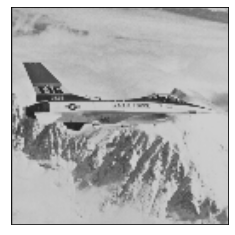

In [84]:
plt.figure()
plt.imshow(lena)
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure()
plt.imshow(jet)
plt.xticks([]), plt.yticks([])
plt.show()

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

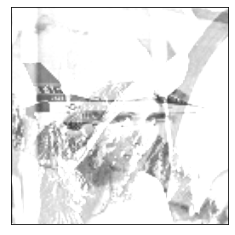

In [86]:
lena_jet = cv2.add(lena, jet)
plt.figure()
plt.imshow(lena_jet)
plt.xticks([]), plt.yticks([])
plt.show()

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`).
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić. _
Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki._

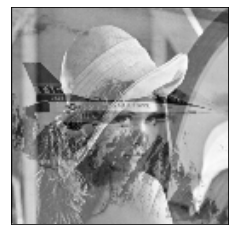

In [90]:
lena_jet16 = cv2.add(lena.astype('uint16'),jet.astype('uint16'))
cv2.normalize(lena_jet16,  lena_jet16, 0, 255, cv2.NORM_MINMAX)

plt.figure()
plt.imshow(lena_jet16.astype('uint8'))
plt.xticks([]), plt.yticks([])
plt.show()

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

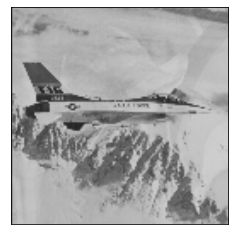

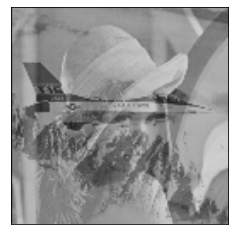

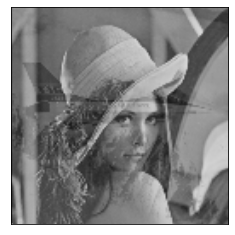

In [94]:
alpha = 0.1
beta = 1 - alpha
dst = cv2.addWeighted(lena, alpha, jet, beta, 0.0)
plt.figure()
plt.imshow(dst)
plt.xticks([]), plt.yticks([])
plt.show()

alpha = 0.4
beta = 1 - alpha
dst = cv2.addWeighted(lena, alpha, jet, beta, 0.0)
plt.figure()
plt.imshow(dst)
plt.xticks([]), plt.yticks([])
plt.show()

alpha = 0.7
beta = 1 - alpha
dst = cv2.addWeighted(lena, alpha, jet, beta, 0.0)
plt.figure()
plt.imshow(dst)
plt.xticks([]), plt.yticks([])
plt.show()

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

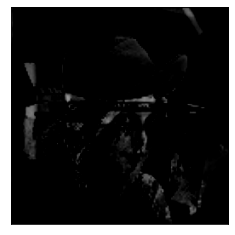

In [99]:
plt.figure()
plt.imshow(cv2.subtract(lena, jet))
plt.xticks([]), plt.yticks([])
plt.show()

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ obrazów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

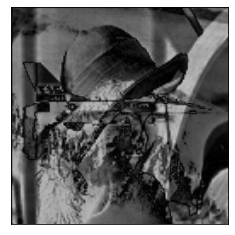

In [98]:
subtraction = np.abs(cv2.subtract(lena.astype('int16'), jet.astype('int16')))
plt.figure()
plt.imshow(subtraction)
plt.xticks([]), plt.yticks([])
plt.show()

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

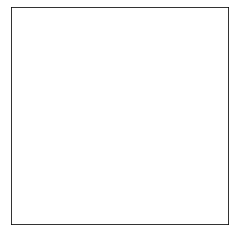

In [101]:
multiply = cv2.multiply(lena, jet)
plt.figure()
plt.imshow(multiply)
plt.xticks([]), plt.yticks([])
plt.show()

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

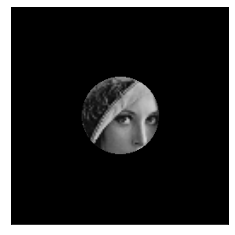

In [105]:
if not os.path.exists("kolo.bmp"):
  !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp
  kolo = cv2.imread('kolo.bmp')

mask_multiply = cv2.multiply(lena, (kolo).astype('bool').astype('uint8'))
plt.figure()
plt.imshow(mask_multiply)
plt.xticks([]), plt.yticks([])
plt.show()

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

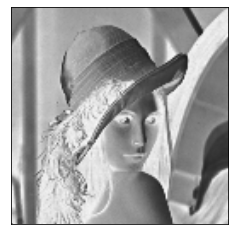

In [108]:
#LUT(lena, lut.odwrotna)

negative = cv2.bitwise_not(lena)
plt.figure()
plt.imshow(negative)
plt.xticks([]), plt.yticks([])
plt.show()

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

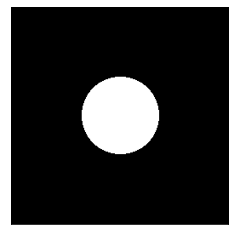

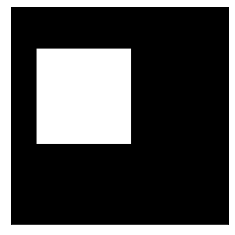

In [110]:
plt.figure()
plt.imshow(kolo)
plt.xticks([]), plt.yticks([])
plt.show()

if not os.path.exists("kwadrat.bmp"):
  !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp
kwadrat = cv2.imread('kwadrat.bmp')
plt.figure()
plt.imshow(kwadrat)
plt.xticks([]), plt.yticks([])
plt.show()

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

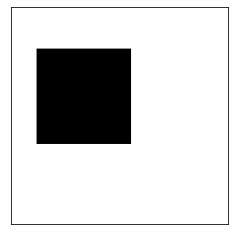

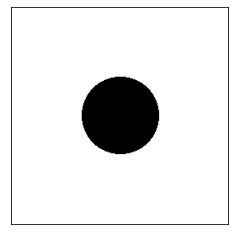

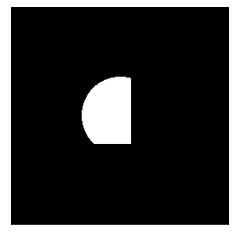

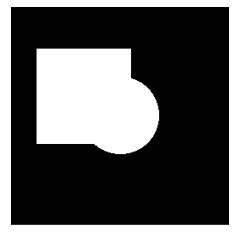

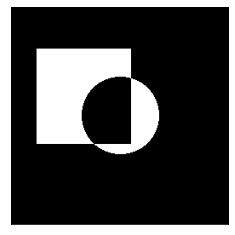

In [112]:
not_kwadrat = ~kwadrat
plt.figure()
plt.imshow(not_kwadrat)
plt.xticks([]), plt.yticks([])
plt.show()

not_kolo = ~kolo
plt.figure()
plt.imshow(not_kolo)
plt.xticks([]), plt.yticks([])
plt.show()

kwadrat_and_kolo = kwadrat&kolo
plt.figure()
plt.imshow(kwadrat_and_kolo)
plt.xticks([]), plt.yticks([])
plt.show()

kwadrat_or_kolo = kwadrat|kolo
plt.figure()
plt.imshow(kwadrat_or_kolo)
plt.xticks([]), plt.yticks([])
plt.show()

kwadrat_xor_kolo = kwadrat^kolo
plt.figure()
plt.imshow(kwadrat_xor_kolo)
plt.xticks([]), plt.yticks([])
plt.show()